In [183]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [184]:
df = pd.read_csv('marketing_data.csv')

In [185]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,"$66,476.00",0,1,3/7/13,99,372,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,"$46,310.00",1,0,12/3/12,99,185,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,"$65,819.00",0,0,11/29/12,99,267,...,10,3,0,0,0,0,0,0,0,IND


In [186]:
#1.	After importing the data, examine variables such as Dt_Customer and Income to verify their accurate importation.
df.sample(10)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
1992,1745,1962,PhD,Divorced,"$85,696.00",0,0,5/3/13,88,714,...,9,1,0,0,0,0,0,1,0,SP
1916,4998,1962,Graduation,Together,"$76,081.00",0,0,5/23/14,85,292,...,4,2,0,0,0,1,0,0,0,SP
1425,8727,1978,Graduation,Divorced,"$63,693.00",0,1,10/14/13,63,587,...,9,6,0,0,0,0,0,0,0,SA
2236,5263,1977,2n Cycle,Married,"$31,056.00",1,0,1/22/13,99,5,...,3,8,0,0,0,0,0,0,0,SP
2014,1404,1968,Graduation,Together,"$34,916.00",2,0,5/15/13,89,51,...,3,9,0,0,0,0,0,0,0,SA
905,9847,1955,2n Cycle,Married,"$62,972.00",0,1,8/3/12,39,313,...,3,6,0,0,0,0,0,0,0,SP
2082,9916,1954,Graduation,Married,"$38,998.00",1,1,11/3/12,92,34,...,3,8,0,0,0,0,0,0,1,SA
1403,6086,1955,Graduation,Married,"$80,395.00",0,0,11/23/13,62,445,...,12,2,0,0,0,1,0,0,0,AUS
586,5527,1987,Graduation,Together,"$22,434.00",1,0,2/13/13,25,4,...,3,8,0,0,0,0,0,0,0,SP
527,9432,1977,Graduation,Together,"$666,666.00",1,0,6/2/13,23,9,...,3,6,0,0,0,0,0,0,0,SA


In [187]:
#2.There are missing income values for some customers. Conduct missing value imputation, considering that customers with similar education and marital status tend to have comparable yearly incomes, on average. 
#It may be necessary to cleanse the data before proceeding. Specifically, scrutinize the categories of education and marital status for data cleaning.
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
 Income                24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [188]:
df.describe()

,ID,Year_Birth,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,...,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,...,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,...,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,...,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,...,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,...,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [189]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [190]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: count, dtype: int64

In [194]:
#cleaning marital status
def clean_marital_status(x):
    x = x.strip().lower()
    if x in ['married','together']:
        return 'married'
    if x in ['single','alone','yolo']:
        return 'unmarried'
    if x == 'absurd':
        return 'unknown'
    if x == 'widow':
        return 'widowed'
    else:
        return x 

df['Marital_Status'] = df['Marital_Status'].apply(clean_marital_status)

In [195]:
df['Marital_Status'].value_counts()

Marital_Status
married      1444
unmarried     485
divorced      232
widowed        77
unknown         2
Name: count, dtype: int64

In [196]:
df['Education'].unique()

array(['Graduation', 'PhD', '2n Cycle', 'Master', 'Basic'], dtype=object)

In [197]:
#cleaning Education
def clean_education(x):
    x = x.strip().lower()
    if x in ['phd','master','2n cycle']:
        return 'post graduation'
    if x == 'basic':
        return 'secondary'
    else:
        return x 

df['Education'] = df['Education'].apply(clean_education)

In [198]:
df['Education'].value_counts()

Education
graduation         1127
post graduation    1059
secondary            54
Name: count, dtype: int64

In [199]:
#to remove any preceeding or trailing spaces
df.columns = df.columns.str.strip()

In [200]:
df.shape

(2240, 28)

In [201]:
df.isna().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [202]:
#to change the string values of income to float
df['Income']= df['Income'].replace('[/$,]','', regex = True).astype(float)

In [203]:
 df['Income']

0       84835.0
1       57091.0
2       67267.0
3       32474.0
4       21474.0
         ...   
2235    66476.0
2236    31056.0
2237    46310.0
2238    65819.0
2239    94871.0
Name: Income, Length: 2240, dtype: float64

In [204]:
#to fill missing income values with rows containing similar marital status and education
df['Income']= df.groupby(['Marital_Status','Education'])['Income'].transform(lambda x:x.fillna(x.mean()))

In [205]:
df.isna().sum() #output suggests that all missing values are filled

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Response               0
Complain               0
Country                0
dtype: int64

In [206]:
#checking for duplicates just in case
df.duplicated().sum()

np.int64(0)

In [207]:
#3.Create variables to represent the total number of children, age, and total spending.
# Derive the total purchases from the number of transactions across the three channels.
df.columns


Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [208]:
#column for total number of children
df['Children']= df['Kidhome'] + df['Teenhome']

In [209]:
df['Children']

0       0
1       0
2       1
3       2
4       1
       ..
2235    1
2236    1
2237    1
2238    0
2239    2
Name: Children, Length: 2240, dtype: int64

In [210]:
#Column for age
df['Age'] = 2025 - df['Year_Birth'] 

In [211]:
df['Age']

0       55
1       64
2       67
3       58
4       36
        ..
2235    49
2236    48
2237    49
2238    47
2239    56
Name: Age, Length: 2240, dtype: int64

In [212]:
#column for total spend
df['Total_Spend'] = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis =1)

In [213]:
df['Total_Spend']

0       1190
1        577
2        251
3         11
4         91
        ... 
2235     689
2236      55
2237     309
2238    1383
2239    1078
Name: Total_Spend, Length: 2240, dtype: int64

In [214]:
#column for total purchase across three channels
df['Total_Purchase'] = df[['NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(axis= 1)

In [215]:
df['Total_Purchase']

0       14
1       17
2       10
3        3
4        6
        ..
2235    18
2236     4
2237    12
2238    19
2239    17
Name: Total_Purchase, Length: 2240, dtype: int64

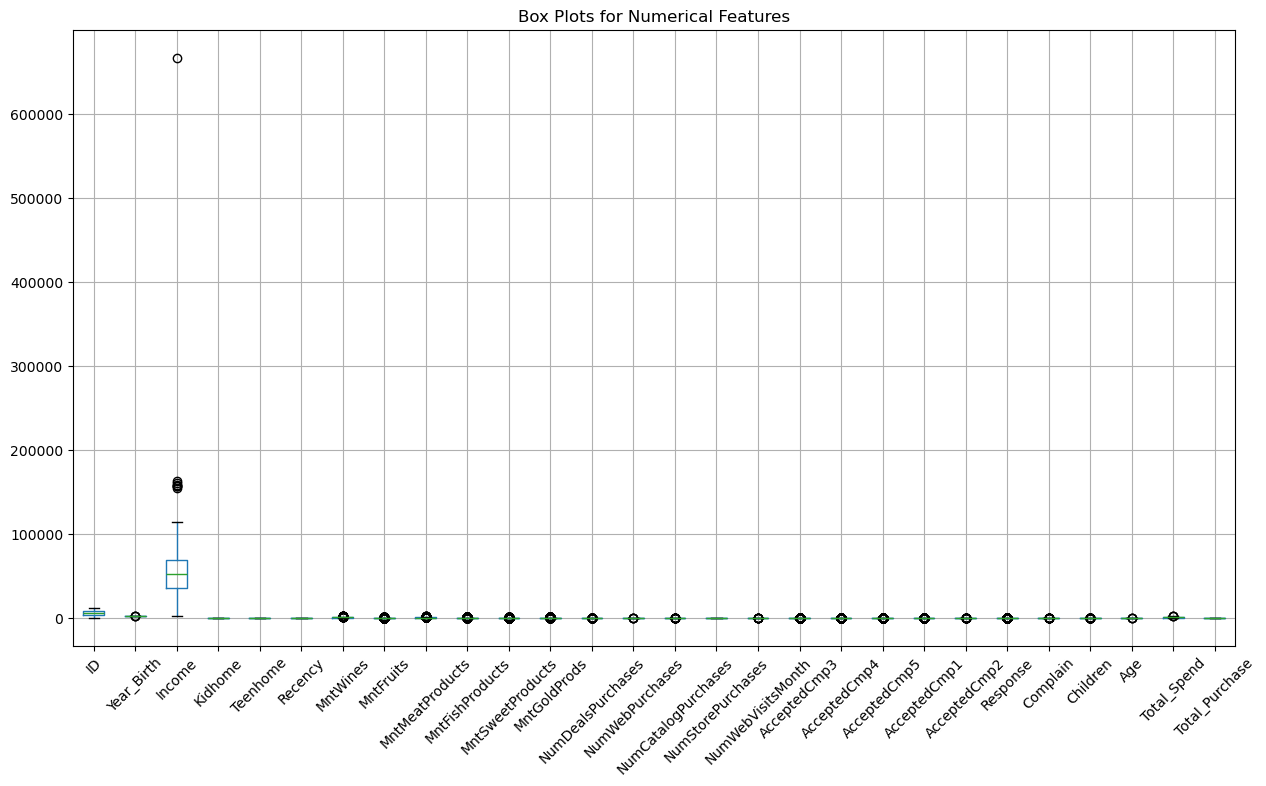

In [216]:
#4.Generate box plots and histograms to gain insights into the distributions and identify outliers. 
#-->implement outlier treatment as needed.
num_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 8))
df[num_cols].boxplot()
plt.title('Box Plots for Numerical Features')
plt.xticks(rotation=45)
plt.show()
#output shows there are outliers in income column.

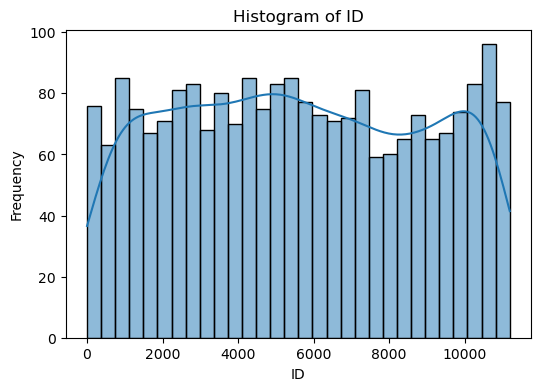

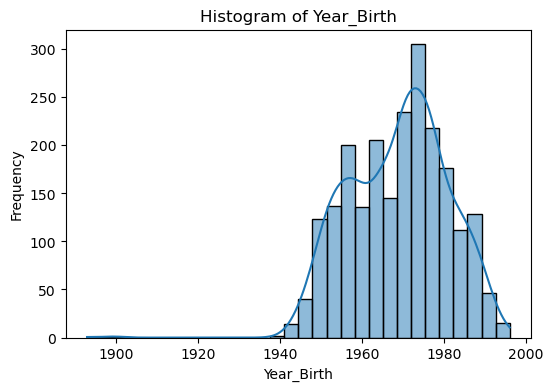

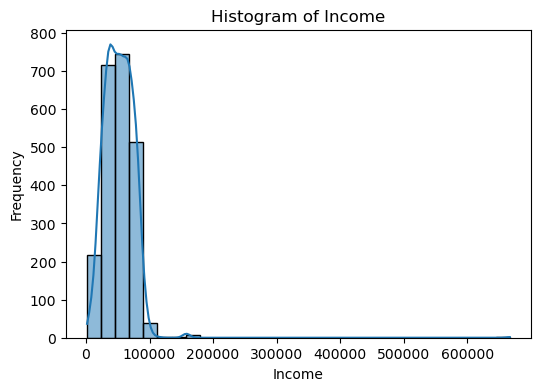

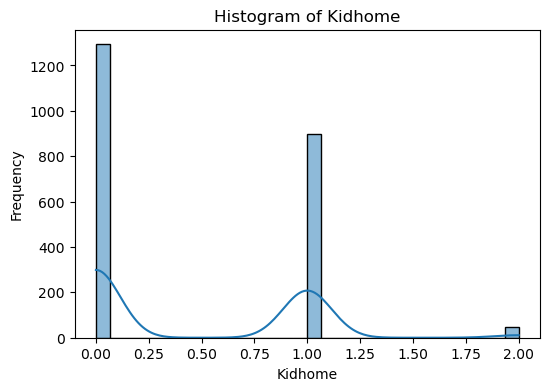

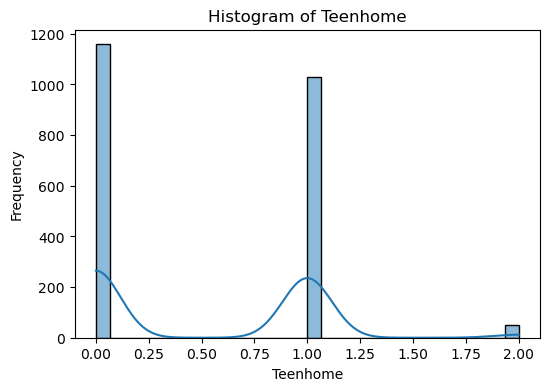

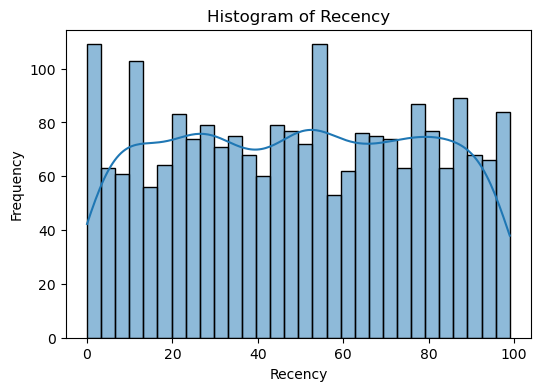

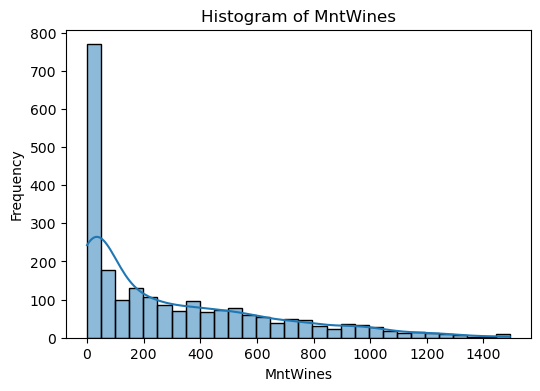

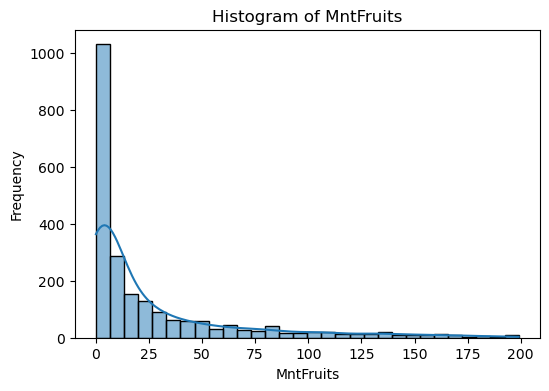

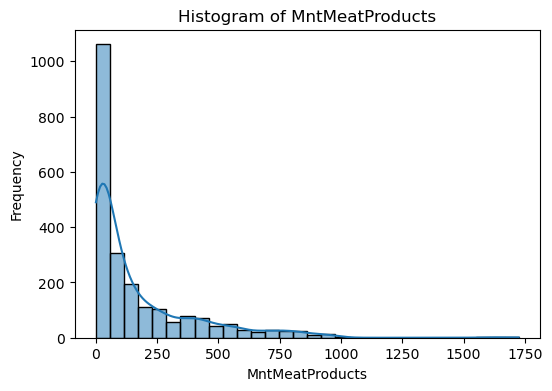

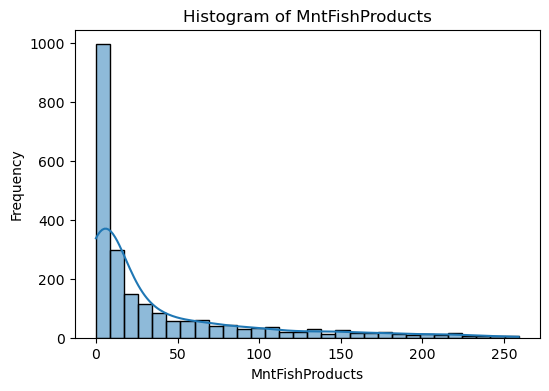

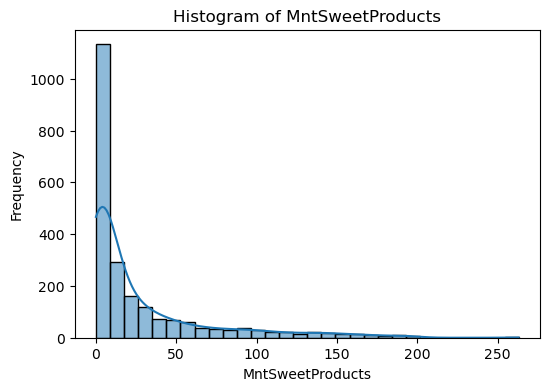

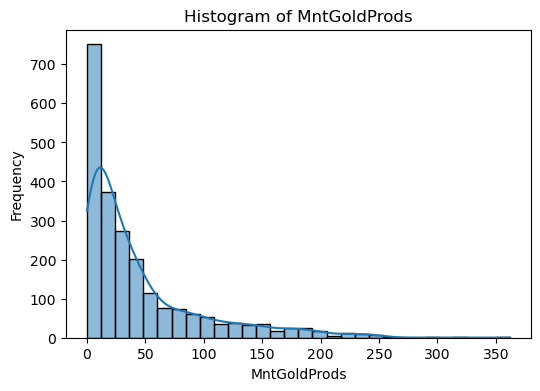

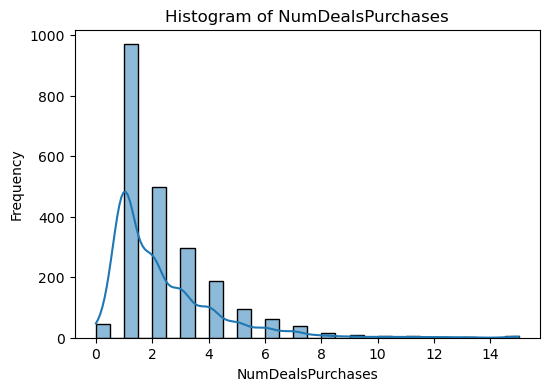

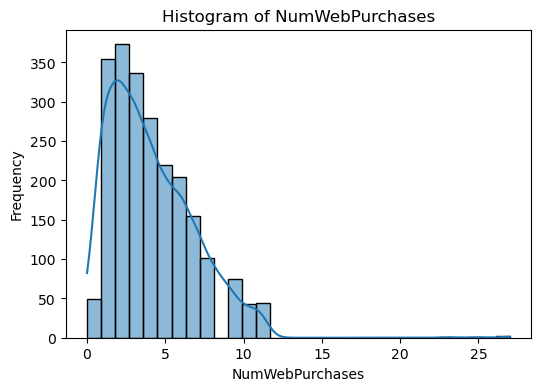

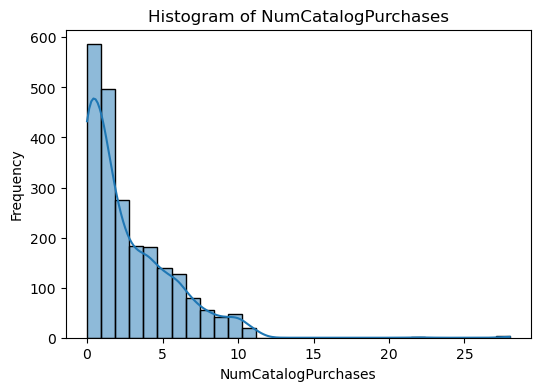

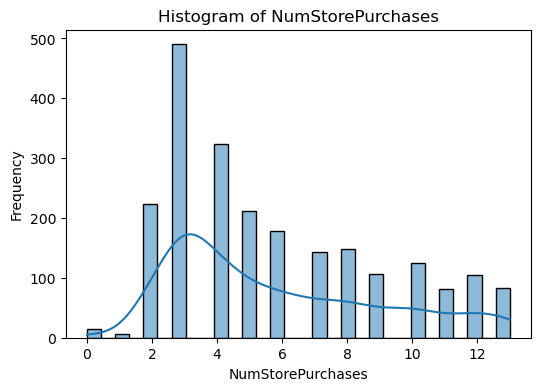

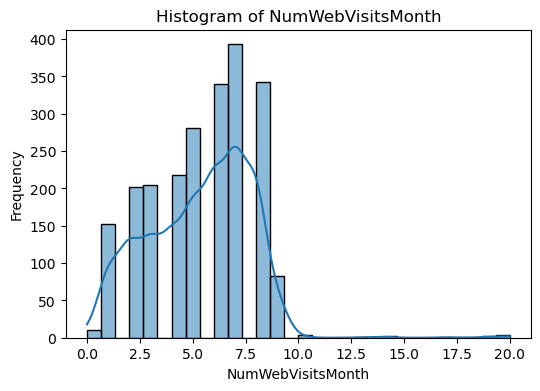

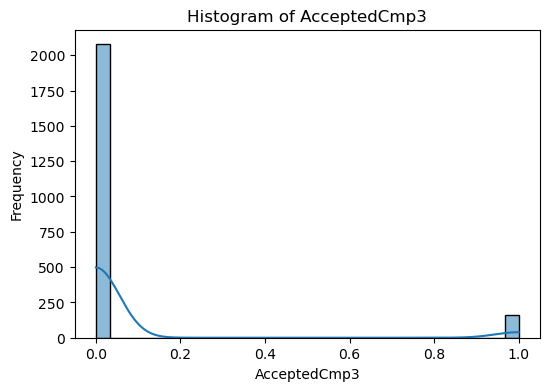

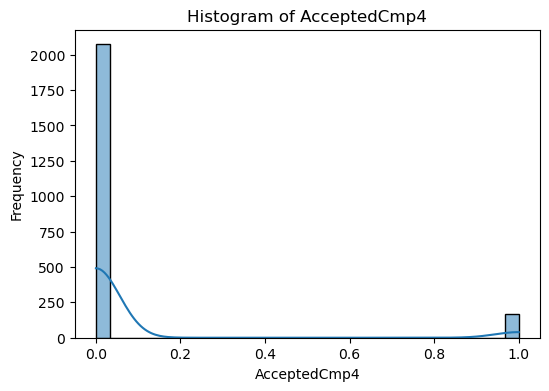

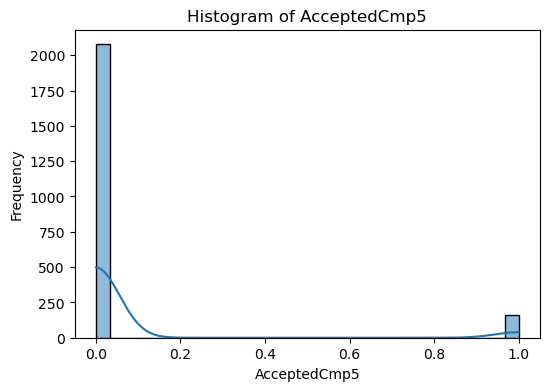

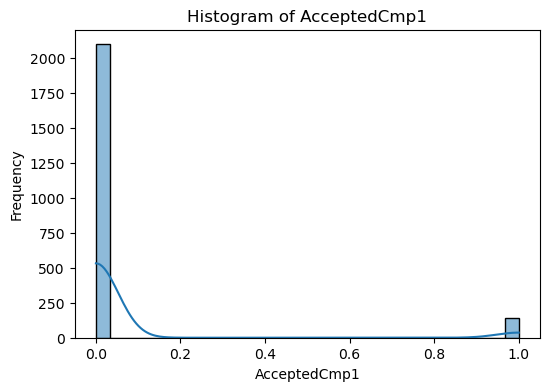

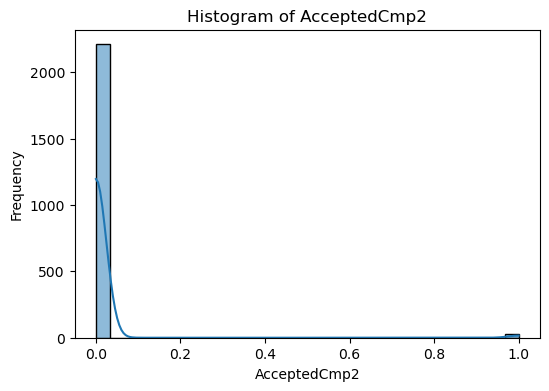

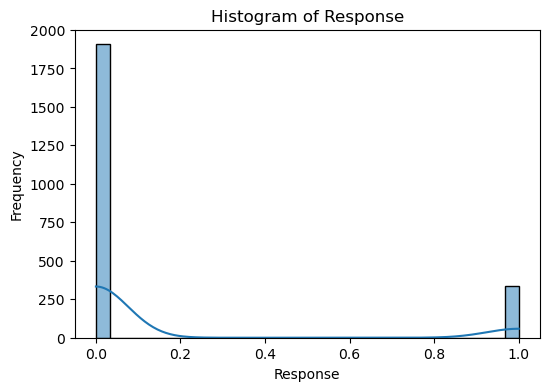

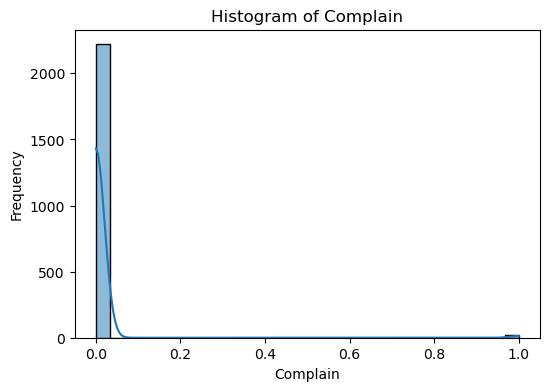

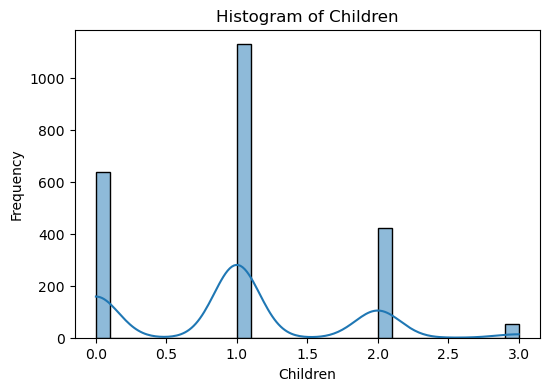

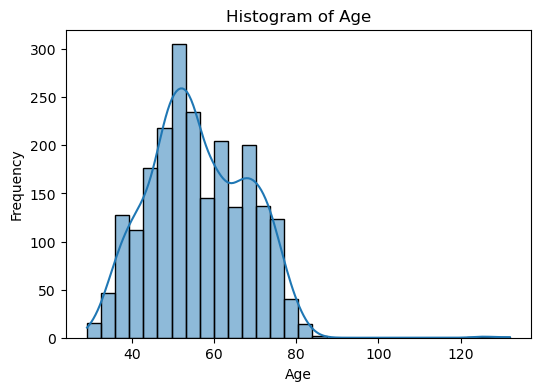

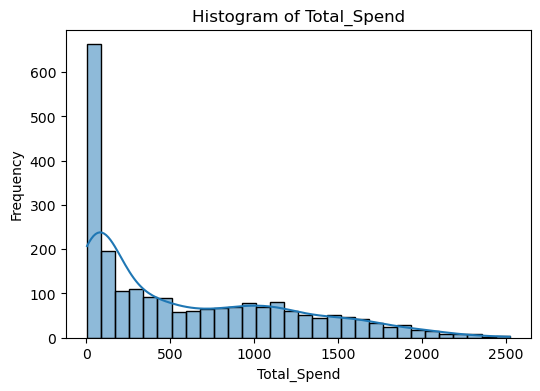

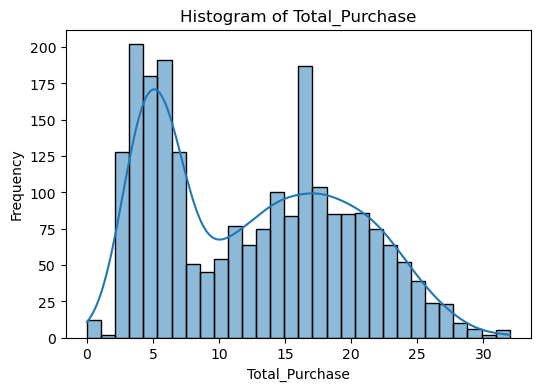

In [217]:
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [218]:
#finding outliers using function
q1,q3 = np.quantile(a = df['Income'], q = [0.25,0.75])
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
outliers = [x for x in df['Income'] if (x<lower) or (x>upper)]
outliers
#output gives 8 entries of outliers

[157146.0,
 160803.0,
 666666.0,
 162397.0,
 157733.0,
 153924.0,
 156924.0,
 157243.0]

In [219]:
#Since the outliers seems to be genuine wealthy customers,so instead of removing them,we try to clip them as per standard approach.
df['Income'] = df['Income'].clip(lower,upper)

In [220]:
q1,q3 = np.quantile(a = df['Income'], q = [0.25,0.75])
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
outliers1 = [x for x in df['Income'] if (x<lower) or (x>upper)]
outliers1 #output shows no more outliers. 

[]

In [221]:
#5.Apply ordinal and one-hot encoding based on the various types of categorical variables.
#Logic:> Identifying categorical datas: Education, Marital_status, Country.
      #> Rankable column: Education--> Ordinal Encoding
      #> Non-rankable column: Marital_status and Country--> One-hot encoding
'''Ordinal Encoding'''
from sklearn.preprocessing import OrdinalEncoder
edu_order = ['secondary','graduation','post graduation']
ordinal = OrdinalEncoder(categories=[edu_order])
df['Education_Ordinal'] = ordinal.fit_transform(df[['Education']])

In [222]:
df['Education_Ordinal'].sample(10)

965     1.0
1510    2.0
1740    2.0
1318    1.0
2133    2.0
686     1.0
1036    1.0
1173    1.0
1553    2.0
1537    2.0
Name: Education_Ordinal, dtype: float64

In [223]:
'''One-Hot Encoding'''
df = pd.get_dummies(df, columns=['Marital_Status','Country'], prefix = ['Status','Country'])

In [224]:
df

,ID,Year_Birth,Education,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,Status_unmarried,Status_widowed,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,1826,1970,graduation,84835.0,0,0,6/16/14,0,189,104,...,False,False,False,False,False,False,False,False,True,False
1,1,1961,graduation,57091.0,0,0,6/15/14,0,464,5,...,True,False,False,True,False,False,False,False,False,False
2,10476,1958,graduation,67267.0,0,1,5/13/14,0,134,11,...,False,False,False,False,False,False,False,False,False,True
3,1386,1967,graduation,32474.0,1,1,5/11/14,0,10,0,...,False,False,True,False,False,False,False,False,False,False
4,5371,1989,graduation,21474.0,1,0,4/8/14,0,6,16,...,True,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,post graduation,66476.0,0,1,3/7/13,99,372,18,...,False,False,False,False,False,False,False,False,False,True
2236,5263,1977,post graduation,31056.0,1,0,1/22/13,99,5,10,...,False,False,False,False,False,False,False,False,True,False
2237,22,1976,graduation,46310.0,1,0,12/3/12,99,185,2,...,False,False,False,False,False,False,False,False,True,False
2238,528,1978,graduation,65819.0,0,0,11/29/12,99,267,38,...,False,False,False,False,False,True,False,False,False,False


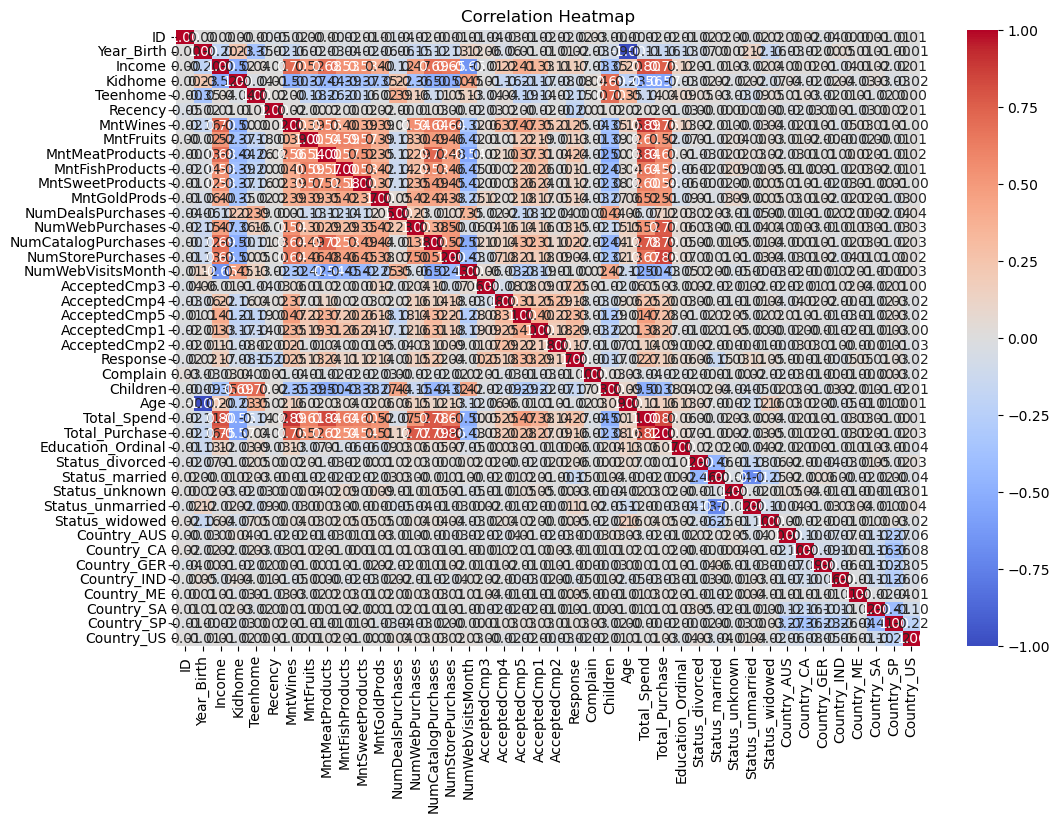

In [225]:
#6.Generate a heatmap to illustrate the correlation between different pairs of variables.
#-->Calculating Correlation
corr = df.corr(numeric_only = True)
#-->setting the figure
plt.figure(figsize=(12,8))
#-->drawing the heatmap
sns.heatmap(corr, annot = True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [226]:
# Display correlation matrix
print(corr)

                           ID  Year_Birth    Income   Kidhome  Teenhome  \
ID                   1.000000    0.000028  0.002223  0.002406 -0.002580   
Year_Birth           0.000028    1.000000 -0.202400  0.230176 -0.352111   
Income               0.002223   -0.202400  1.000000 -0.519080  0.035755   
Kidhome              0.002406    0.230176 -0.519080  1.000000 -0.036133   
Teenhome            -0.002580   -0.352111  0.035755 -0.036133  1.000000   
Recency             -0.046524   -0.019871  0.005523  0.008827  0.016198   
MntWines            -0.022878   -0.157773  0.704959 -0.496297  0.004846   
MntFruits            0.004600   -0.017917  0.520188 -0.372581 -0.176764   
MntMeatProducts     -0.004437   -0.030872  0.684304 -0.437129 -0.261160   
MntFishProducts     -0.024475   -0.041625  0.533551 -0.387644 -0.204187   
MntSweetProducts    -0.007642   -0.018133  0.532912 -0.370673 -0.162475   
MntGoldProds        -0.013438   -0.061818  0.397046 -0.349595 -0.021725   
NumDealsPurchases   -0.03

In [227]:
# Extract strongest correlations (excluding diagonal)
import numpy as np

# Get upper triangle of correlation matrix (to avoid duplicates)
mask = np.triu(np.ones_like(corr, dtype=bool), k=1)
corr_flat = corr.where(mask)

# Stack and sort correlations
corr_sorted = corr_flat.stack().sort_values(ascending=False)

print("\n=== TOP 10 STRONGEST POSITIVE CORRELATIONS ===")
print(corr_sorted.head(10))

print("\n=== TOP 10 STRONGEST NEGATIVE CORRELATIONS ===")
print(corr_sorted.tail(10))


=== TOP 10 STRONGEST POSITIVE CORRELATIONS ===
MntWines             Total_Spend       0.891839
NumStorePurchases    Total_Purchase    0.855454
MntMeatProducts      Total_Spend       0.842965
Total_Spend          Total_Purchase    0.820687
Income               Total_Spend       0.804142
NumCatalogPurchases  Total_Purchase    0.785609
                     Total_Spend       0.778577
NumWebPurchases      Total_Purchase    0.765923
MntWines             Total_Purchase    0.756490
Income               Total_Purchase    0.753789
dtype: float64

=== TOP 10 STRONGEST NEGATIVE CORRELATIONS ===
MntMeatProducts      Children              -0.502208
Kidhome              NumCatalogPurchases   -0.502237
Income               Kidhome               -0.519080
NumCatalogPurchases  NumWebVisitsMonth     -0.520364
MntMeatProducts      NumWebVisitsMonth     -0.539470
Kidhome              Total_Spend           -0.556669
                     Total_Purchase        -0.568637
Income               NumWebVisitsMonth

In [228]:
#7.	Test the following hypotheses:
#a.Older individuals may not possess the same level of technological proficiency and may, therefore, lean toward traditional in-store shopping preferences.
#b.Customers with children likely experience time constraints, making online shopping a more convenient option.
#c.Sales at physical stores may face the risk of cannibalization by alternative distribution channels.
#d.Does the United States significantly outperform the rest of the world in total purchase volumes?

#7a.step1: hypothesis statement:
#Ho= Senior age group doesn't affect preferences for in-store v/s online shopping.
#H1= Older individuals prefer in-store shopping

#step2:Spitting age group
df['Age_Group']= pd.cut(df['Age'],bins=[0,35,55,100],labels=['Young','Middle','Senior'])

In [229]:
df['Age_Group']

0       Middle
1       Senior
2       Senior
3       Senior
4       Middle
         ...  
2235    Middle
2236    Middle
2237    Middle
2238    Middle
2239    Senior
Name: Age_Group, Length: 2240, dtype: category
Categories (3, object): ['Young' < 'Middle' < 'Senior']

In [230]:
#step3: Using paired t-test
from scipy.stats import ttest_rel

senior_store = df[df['Age_Group'] =='Senior']['NumStorePurchases']
senior_web = df[df['Age_Group'] =='Senior']['NumWebPurchases']

t_stat,p_val = ttest_rel(senior_store,senior_web)
p_val

np.float64(1.6081988723969082e-59)

In [231]:
if p_val < 0.05:
   print('Reject H0 & Accept H1')
   print('Older individuals prefer in-store shopping')

if p_val >= 0.05:
    print('Accept H0 & Reject H1')
    print("Senior age group doesn't affect preferences for in-store v/s online shopping")

Reject H0 & Accept H1
Older individuals prefer in-store shopping


In [232]:
#7b.Hypothesis statement
#H0:Customers with and without children have the same average online shopping behavior.
#H1:Customers with children have a higher average online shopping activity.

df['Has_Children'] = df['Children'] > 0

In [233]:
from scipy.stats import ttest_ind

with_children = df[df['Has_Children'] == True]['NumWebPurchases']
without_children = df[df['Has_Children'] == False]['NumWebPurchases']
#using two sample t-test
t_stat, p_val = ttest_ind(with_children,without_children, equal_var = False)
p_val

np.float64(0.0004108102700005601)

In [234]:
if p_val < 0.05:
   print('Reject H0 & Accept H1')
   print('Customers with children have a higher average online shopping activity.')

if p_val >= 0.05:
    print('Accept H0 & Reject H1')
    print("Customers with and without children have the same average online shopping behavior.")

Reject H0 & Accept H1
Customers with children have a higher average online shopping activity.


In [235]:
#7c.hypothesis statement
#H0:Sales through alternative channels are not associated with a decrease in store purchases.
#H1:Sales through alternative channels cannibalize store purchases.

df['AltActive'] = (df['NumWebPurchases'] + df['NumCatalogPurchases']) > 0

In [236]:
active = df[df['AltActive']]['NumStorePurchases']
inactive = df[~df['AltActive']]['NumStorePurchases']

#using two sample t test
t_stat, p_val = ttest_ind(active, inactive, equal_var=False)
p_val


np.float64(2.6442923574177784e-21)

In [237]:
if p_val < 0.05:
   print('Reject H0 & Accept H1')
   print('Sales through alternative channels cannibalize store purchases.')

if p_val >= 0.05:
    print('Accept H0 & Reject H1')
    print("Sales through alternative channels are not associated with a decrease in store purchases.")

Reject H0 & Accept H1
Sales through alternative channels cannibalize store purchases.


In [238]:
#7d.hypothesis statement
#H0:U.S. customers' average total purchase volume is equal to (or less than) that of international customers.
#H1:U.S. customers' average total purchase volume is significantly greater than international customers.

# Filter U.S. and non-U.S. customers
us_purchases = df[df['Country_US'] == True]['Total_Purchase']
intl_purchases = df[df['Country_US'] == False]['Total_Purchase']

In [239]:
#using two sample t test
t_stat, p_val = ttest_ind(us_purchases, intl_purchases, equal_var=False)
p_val

np.float64(0.1446759042957516)

In [240]:
if p_val < 0.05:
   print('Reject H0 & Accept H1')
   print("U.S. customers' average total purchase volume is significantly greater than international customers.")

if p_val >= 0.05:
    print('Accept H0 & Reject H1')
    print("U.S. customers' average total purchase volume is equal to (or less than) that of international customers.")

Accept H0 & Reject H1
U.S. customers' average total purchase volume is equal to (or less than) that of international customers.


In [131]:
#8.Use appropriate visualization to help analyze the following:
#a.Identify the top-performing products and those with the lowest revenue.
#b.Examine if there is a correlation between customers' age and the acceptance rate of the last campaign.
#c.Determine the country with the highest number of customers who accepted the last campaign.
#d.Investigate if there is a discernible pattern in the number of children at home and the total expenditure.
#e.Analyze the educational background of customers who lodged complaints in the last two years

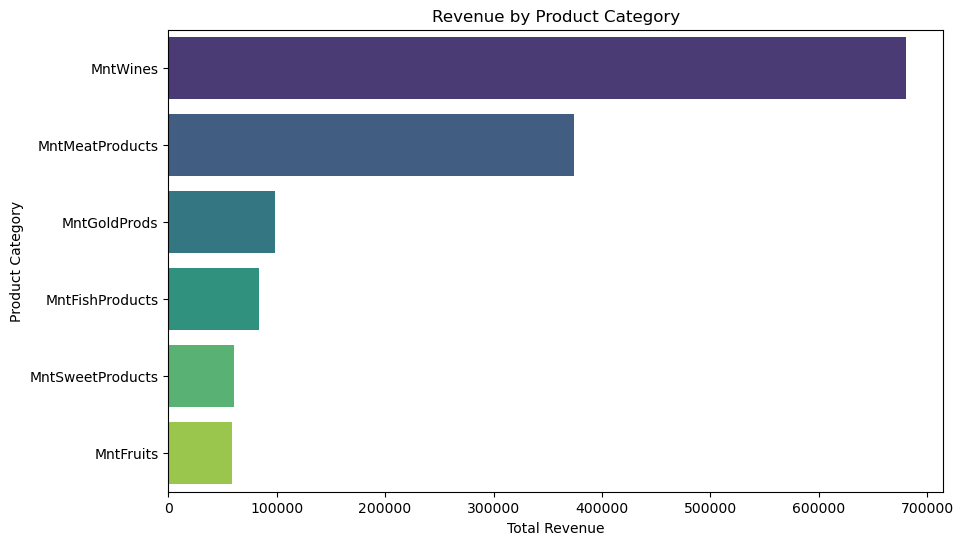

In [241]:
#8a.Using barplot
product_column = ['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']

product_revenue = df[product_column].sum().sort_values(ascending = False)

plt.figure(figsize=(10,6))
sns.barplot(x=product_revenue.values, y=product_revenue.index, palette='viridis',legend=False,hue=product_revenue.index)
plt.title('Revenue by Product Category')
plt.xlabel('Total Revenue')
plt.ylabel('Product Category')
plt.show() 

In [242]:
print(f"Top-performing product: {product_revenue.idxmax()}")
print(f"Lowest revenue product: {product_revenue.idxmin()}")

Top-performing product: MntWines
Lowest revenue product: MntFruits


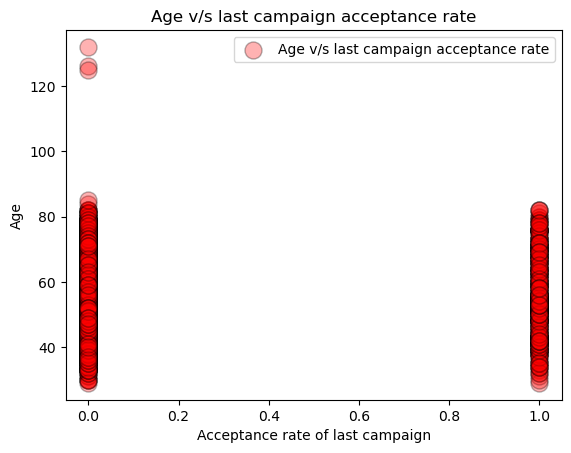

In [243]:
#8b Using line graph
plt.scatter(df['Response'],df['Age'],label='Age v/s last campaign acceptance rate',marker='o',edgecolors='k',color='r',s=150,alpha=0.3)
plt.xlabel('Acceptance rate of last campaign')
plt.ylabel('Age')
plt.title('Age v/s last campaign acceptance rate')
plt.legend()
plt.show()

In [244]:
df[['Age','Response']].corr() #shows negative linear relationship.

,Age,Response
Age,1.000000,-0.021325
Response,-0.021325,1.000000


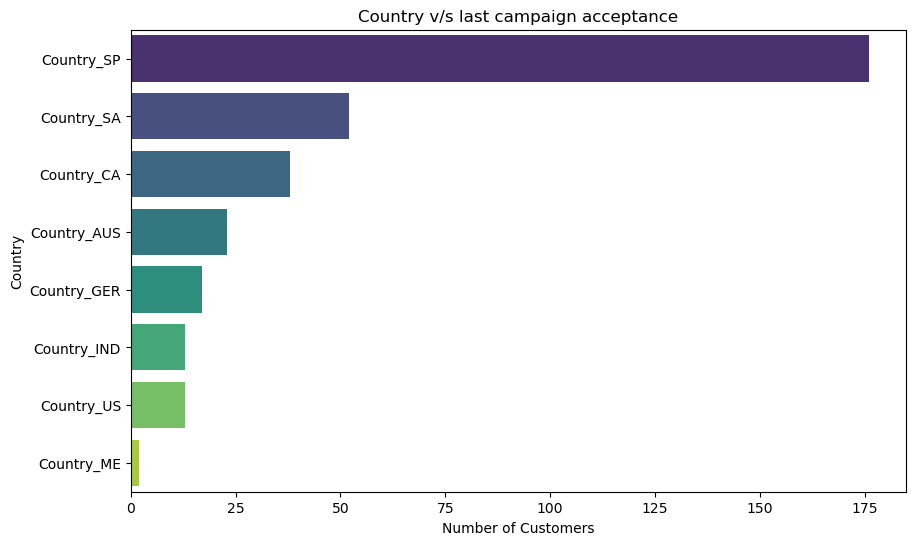

In [245]:
#8c Using bar plot
country_column = ['Country_AUS','Country_CA','Country_GER','Country_IND','Country_ME','Country_SA','Country_SP','Country_US']

accepted = df[df['Response'] == 1]

country_accepts = accepted[country_column].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=country_accepts.values, y=country_accepts.index, palette='viridis',legend=False,hue=country_accepts.index)
plt.title('Country v/s last campaign acceptance')
plt.xlabel('Number of Customers')
plt.ylabel('Country')
plt.show() 

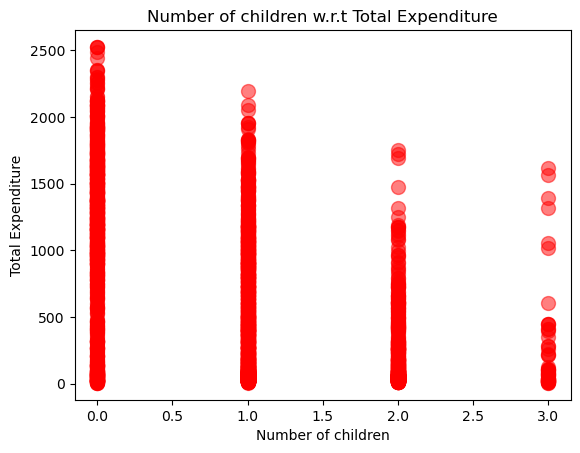

In [246]:
#8d Using line graph
plt.scatter(df['Children'],df['Total_Spend'],marker='o',color='r',s=100,alpha=0.5)
plt.xlabel('Number of children')
plt.ylabel('Total Expenditure')
plt.title('Number of children w.r.t Total Expenditure')
plt.show()

In [247]:
df[['Children','Total_Spend']].corr()#shows negative linear relationship

,Children,Total_Spend
Children,1.000000,-0.498888
Total_Spend,-0.498888,1.000000


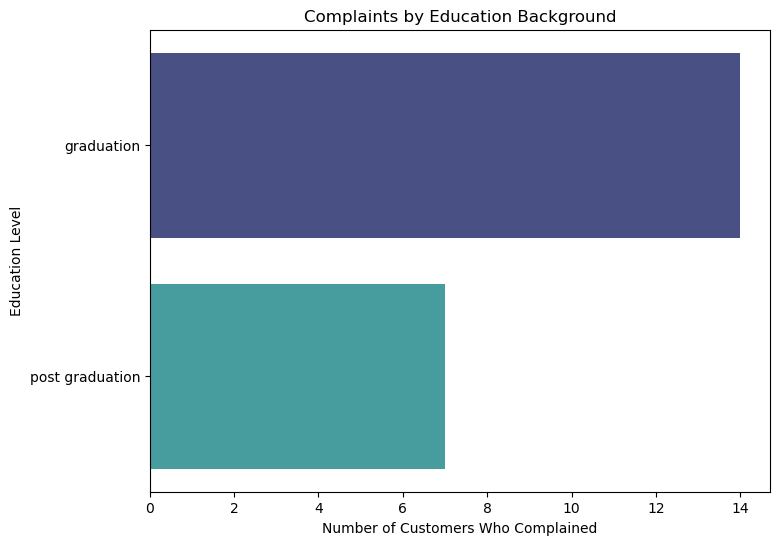

In [248]:
#8e
education_col = 'Education_Ordinal'    
complain_col = 'Complain'      

# Filter customers who have lodged complaints 
complaint_customers = df[df[complain_col] == 1]

# Count or value_counts based on education levels
education_counts = complaint_customers[education_col].value_counts().sort_index()

education_labels = {0: "secondary", 1: "graduation", 2: "post graduation"}
education_counts.index = education_counts.index.map(education_labels)

plt.figure(figsize=(8, 6))
sns.barplot(x=education_counts.values, y=education_counts.index, palette='mako',hue=education_counts.index,legend=False)
plt.title('Complaints by Education Background')
plt.xlabel('Number of Customers Who Complained')
plt.ylabel('Education Level')
plt.show()
#output shows the graduated people have raised complains more than post-graduated ones.
